#Introduction to Classical Machine Learning
In this notebook, we will explore how to use and test classical Machine Learning algorithms including:
- Linear Regression
- K-Nearest Neighbors
- Decision Trees


In [ ]:
RANDOM_SEED=48
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Linear Regression
For this exercise, we will be using Boston Housing Prices dataset. It is a simple dataset with clear and explainable features, a perfect use case to demonstrate the power of Linear Regression.

In [ ]:
boston=datasets.load_boston()
print(boston.____)

In [ ]:
bs_df=pd.DataFrame(boston.data,columns=boston.feature_names)
bs_df.describe()

In [ ]:
pd.DataFrame(boston.target,columns=["target price"]).describe()

Before training our model, let's first split the data into train and test set:

In [ ]:
from sklearn.model_selection import _____________
boston_x_train,boston_x_test,boston_y_train,boston_y_test=_________(boston.data,boston.target,random_state=RANDOM_SEED,train_size=___)

In [ ]:
from sklearn.linear_model import _________________
linear_model=_____________
reg=linear_model.___(boston_x_train,boston_y_train)

As discussed in the presentation, our performance metric for this regression model will be the **Root Mean Square Error (RMSE)**. 

In [ ]:
from sklearn.metrics import ___________
y_train_pred=reg.predict(boston_x_train)
np.sqrt(___________(boston_y_train,y_train_pred))

In [ ]:
y_test_pred=reg.predict(boston_x_test)
np.sqrt(_________________(boston_y_test,y_test_pred))

Let's try to go deeper and understand the weights that the model is assigning to each feature:

In [ ]:
import collections
features_importance=pd.Series(dict([(boston.feature_names[i],reg.coef_[i]) for i in range(len(boston.feature_names))]))

In [ ]:
plt._____(features_importance.sort_values().index,features_importance.sort_values().values)

## K-Nearest Neighbors


### Iris Dataset Classification Task

For our K-NN example, we will be using two simple datasets: the IRIS dataset and the BMI dataset. 
<hr>
Let's start with the IRIS dataset, a simple flower classification dataset based on the sepal and petal measurements. It is a perfect use case for K-NN because it is not highly dimensional and is easy to visualize. 

In [ ]:
iris=datasets.load_iris()
print(iris.DESCR)

In [ ]:
iris_x_train,iris_x_test,iris_y_train,iris_y_test=train_test_split(iris.data,iris.target,random_state=RANDOM_SEED,train_size=0.8)
iris_df=pd.DataFrame(iris_x_train,columns=iris.feature_names)
iris_df["species"]=iris_y_train
iris_df._______

Let's first try to visualize the features inside this dataset. We will use the Andrew curves plot for this application. Andrew Curves code the data into Fourier Series coefficients and transform each data instance into a sinusoidal graph.

In [ ]:
from pandas.plotting import ___________
plt.figure(figsize=(8,5))
______________(iris_df, "species")
plt.title('Andrews Curves Plot')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

It looks like the data instances are pretty separated, which is a good sign and will make the job easier on KNN.

Let's try next to plot the features and understand their distribution.

In [ ]:
scatter=plt._____(iris_df["sepal length (cm)"],iris_df["sepal width (cm)"],c=iris_df["species"])
plt.legend(handles=scatter.legend_elements()[0],labels=("Iris-Setosa","Iris-Versicolour","Iris-Virginica"))
plt.show()

In [ ]:
scatter=plt._______(iris_df["petal length (cm)"],iris_df["petal width (cm)"],c=iris_df["species"],)
plt.legend(handles=scatter.legend_elements()[0],labels=("Iris-Setosa","Iris-Versicolour","Iris-Virginica"))
plt.show()

Now that we took a look on the data and undertsood a bit its structure, we can proceed into training our KNN model.

In [ ]:
from sklearn.neighbors import ________________
knn=________________(n_neighbors=_)
knn_model=knn.____(iris_x_train,iris_y_train)

In [ ]:
from sklearn.metrics import __________
pred_iris=knn_model.predict(iris_x_train)
___________(iris_y_train,pred_iris)

In [ ]:
pred_iris=knn_model.predict(iris_x_test)
____________(iris_y_test,pred_iris)

Another important step we need to investigate is the effect of the number of neighbors on our model performance:

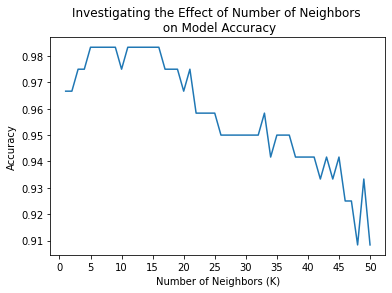

In [ ]:
from sklearn.model_selection import _________
neighbors_nb=np.arange(1,51)
acc=[]

for k in neighbors_nb:
  knn=_________________(n_neighbors=_)
  scores = ____________(knn, iris_x_train, iris_y_train, cv=10, scoring='accuracy')
  acc.append(scores.mean())

plt.plot(neighbors_nb,acc)
plt.xticks(np.arange(0,51,5))
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Investigating the Effect of Number of Neighbors \n on Model Accuracy")
plt.show()

### BMI Dataset Regression Task

Next, we investigate the BMI dataset, in which we try to predict the BMI index of 500 individuals based on their height and weight.

In [ ]:
!wget https://github.com/anisdismail/AI-Club-Workshops-2020-2021/blob/main/datasets/500_Person_Gender_Height_Weight_Index.csv

In [ ]:
import pandas as pd
bmi=pd.read_csv("/content/500_Person_Gender_Height_Weight_Index.csv")
bmi.head(5)

In [ ]:
bmi.describe()

Next let's go a bit deeper to better understand the BMI distribution and its relationship with other features:

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
scatter=plt.scatter(_______,__________,c=_________)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height vs Weight BMI Distribution")
plt.colorbar(scatter,label="BMI")
plt.show()

In [ ]:
from sklearn.neighbors import ___________________
knn=_____________(n_neighbors=5)
scores=cross_val_score(knn, bmi.drop(["Index","Gender"],axis=1), bmi["Index"], cv=10, scoring=________)
np.sqrt(-scores.mean())

## Decision Trees

For the Decision Trees example, we will be using another famous example: the Wine Type classification dataset. This dataset will showcase the power of decision trees and how easy is to explain its results.

To simplify the tree built eventually, we selected the most correlated features with the target value, and we will be using them as our training dataset.

In [ ]:
wine=datasets.load_wine()
db_x_train,db_x_test,db_y_train,db_y_test=train_test_split(wine.data[:,[0,1,5,6,10]],wine.target,random_state=RANDOM_SEED,train_size=0.8)
db_df=pd.DataFrame(db_x_train,columns=np.array(wine.feature_names)[[0,1,5,6,10]])
db_df["type"]=db_y_train
db_df._________

In [ ]:
import seaborn as sns
db_df.corr()["type"]

Let's built the decision tree classifier, and we will be limiting the max depth of the tree to simplify the tree visualization later on.

In [ ]:
from sklearn.tree import _______________
tree=______________(max_depth=3)
tree_clss=tree.___(db_x_train,db_y_train)

In [ ]:
accuracy_score(db_y_train,tree_clss.predict(db_x_train))

0.971830985915493

In [ ]:
accuracy_score(db_y_test,tree_clss.predict(db_x_test))

0.9444444444444444

Now let's export the tree model and visualize it:

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
 tree_clss,
 out_file="db_tree.dot",
 feature_names=np.array(wine.feature_names)[[0,1,5,6,10]],
 class_names=wine.target_names,
 rounded=True,
 filled=True
 )

In [ ]:
!dot -Tpng db_tree.dot -o db_tree.png

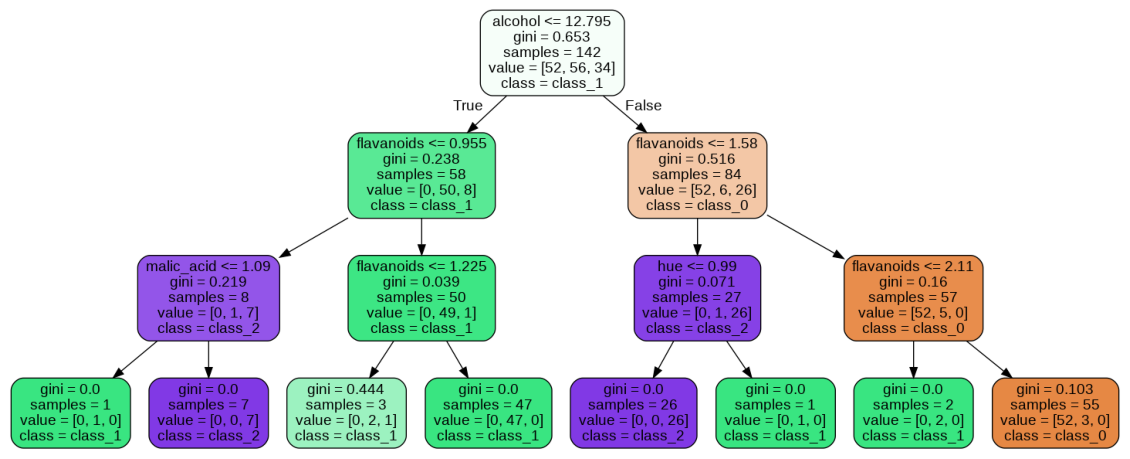

In [ ]:
from PIL import Image
image=Image.open("/content/db_tree.png")
plt.figure(figsize=(20,12))
plt.imshow(image)
plt.axis('off')
plt.show()

As simple as this, this showcase how explainable and transparent are the decisions made by such model. This makes Decision Trees a white-box model, in comparison to Black-box models like Neural Networks.

## Further Steps
This is the end of our workshop today! If you are curious to learn more and dive deeper into this notebook, here are some extra steps:
- Performing hyperparameters tuning for the models used
- Investigating the performance of the trained models using clearer metrics (like precision/recall vs accuracy)
- Adding the deleted features back and investigating whether their addition improves the models or not.
